In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk 
import string
import re
import ast
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from sklearn.neighbors import KNeighborsClassifier

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
# %matplotlib inline
# pd.set_option('display.max_colwidth', 100)

In [30]:
# Load dataset
def load_data():
    data = pd.read_csv('dataset fix.csv')#ubah nama file sesai dengan nama file kalian
    return data

tweet_df = load_data()
tweet_df.head()

#definisi dataframe
df  = pd.DataFrame(tweet_df[['content','sentiment']])#ubah dataframe sesuai column kalian
# df
# df.to_csv('dataset fix.csv',index=False)



In [31]:
#====================================Cleansing=====================================#
#remove usero
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    
df['remove_user'] = np.vectorize(remove_pattern)(df['content'], "@[\w]*")
df

content sentiment  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...         N   
1                              💭 Hari ini panas banget🥵         N   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...         N   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...         N   
4     💭 rekomendasiin film di netflixx yang manis ta...         O   
...                                                 ...       ...   
996                                    susu? makasii 😔🫂         E   
997   💭 Gini banget nasib jadi figuran di circle, se...         N   
998   Selamat pagi di awal bulan yang disambut denga...         E   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng         O   
1000  💭 Sejauh ini kalian pake gimana guys? https://...         O   

                                            remove_user  
0     💭 is it okay if 17 y.o girl (me) have a crush ...  
1                              💭 Hari ini panas banget🥵  
2     🤍 maaf ngeluhhhh terus soal relationship, maki...  
3     aku sekarang 🥲 itu aja dia baru bales dari pag...  
4     💭 rekomendasiin film di netflixx yang manis ta...  
...                                                 ...  
996                                    susu? makasii 😔🫂  
997   💭 Gini banget nasib jadi figuran di circle, se...  
998   Selamat pagi di awal bulan yang disambut denga...  
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng  
1000  💭 Sejauh ini kalian pake gimana guys? https://...  

[1001 rows x 3 columns]

In [32]:
import re
def casefolding(content):
    content = content.lower()
    content = content.strip(" ")
    content = re.sub(r'[?|.|!_:")(-+,]','', content)
    return content
df['casefolding'] = df['remove_user'].apply(casefolding)
df

content sentiment  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...         N   
1                              💭 Hari ini panas banget🥵         N   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...         N   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...         N   
4     💭 rekomendasiin film di netflixx yang manis ta...         O   
...                                                 ...       ...   
996                                    susu? makasii 😔🫂         E   
997   💭 Gini banget nasib jadi figuran di circle, se...         N   
998   Selamat pagi di awal bulan yang disambut denga...         E   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng         O   
1000  💭 Sejauh ini kalian pake gimana guys? https://...         O   

                                            remove_user  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...   
1                              💭 Hari ini panas banget🥵   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...   
4     💭 rekomendasiin film di netflixx yang manis ta...   
...                                                 ...   
996                                    susu? makasii 😔🫂   
997   💭 Gini banget nasib jadi figuran di circle, se...   
998   Selamat pagi di awal bulan yang disambut denga...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000  💭 Sejauh ini kalian pake gimana guys? https://...   

                                            casefolding  
0     💭 is it okay if 17 yo girl me have a crush on ...  
1                              💭 hari ini panas banget🥵  
2     🤍 maaf ngeluhhhh terus soal relationship makin...  
3     aku sekarang 🥲 itu aja dia baru bales dari pag...  
4     💭 rekomendasiin film di netflixx yang manis ta...  
...                                                 ...  
996                                     susu makasii 😔🫂  
997   💭 gini banget nasib jadi figuran di circle sel...  
998   selamat pagi di awal bulan yang disambut denga...  
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng  
1000  💭 sejauh ini kalian pake gimana guys https//tc...  

[1001 rows x 4 columns]

In [33]:
#  #=================================Stopword========================================#
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stop(text):
    factory = StopWordRemoverFactory()
    more_stopword = ['dengan', 'ia','bahwa','oleh']
    stopword= factory.create_stop_word_remover()
    out = stopword.remove(text)
    return out

df['stopword'] = df['casefolding'].apply(stop)
df

content sentiment  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...         N   
1                              💭 Hari ini panas banget🥵         N   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...         N   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...         N   
4     💭 rekomendasiin film di netflixx yang manis ta...         O   
...                                                 ...       ...   
996                                    susu? makasii 😔🫂         E   
997   💭 Gini banget nasib jadi figuran di circle, se...         N   
998   Selamat pagi di awal bulan yang disambut denga...         E   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng         O   
1000  💭 Sejauh ini kalian pake gimana guys? https://...         O   

                                            remove_user  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...   
1                              💭 Hari ini panas banget🥵   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...   
4     💭 rekomendasiin film di netflixx yang manis ta...   
...                                                 ...   
996                                    susu? makasii 😔🫂   
997   💭 Gini banget nasib jadi figuran di circle, se...   
998   Selamat pagi di awal bulan yang disambut denga...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000  💭 Sejauh ini kalian pake gimana guys? https://...   

                                            casefolding  \
0     💭 is it okay if 17 yo girl me have a crush on ...   
1                              💭 hari ini panas banget🥵   
2     🤍 maaf ngeluhhhh terus soal relationship makin...   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...   
4     💭 rekomendasiin film di netflixx yang manis ta...   
...                                                 ...   
996                                     susu makasii 😔🫂   
997   💭 gini banget nasib jadi figuran di circle sel...   
998   selamat pagi di awal bulan yang disambut denga...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000  💭 sejauh ini kalian pake gimana guys https//tc...   

                                               stopword  
0     💭 is it okay if 17 yo girl me have crush on 27...  
1                                       💭 panas banget🥵  
2     🤍 maaf ngeluhhhh relationship kesini komunikas...  
3     🥲 aja bales pagi spamming semalem gitu dibales...  
4     💭 rekomendasiin film netflixx manis ga too muc...  
...                                                 ...  
996                                     susu makasii 😔🫂  
997   💭 gini banget nasib figuran circle aja ditingg...  
998   selamat pagi disambut turun hujan 💭 https//tco...  
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng  
1000           💭 pake gimana guys https//tco/9a5pwp48nh  

[1001 rows x 5 columns]

In [34]:
#=================================Tokenizing========================================#
#tokenize
from nltk.tokenize import TweetTokenizer

def token(tweet):
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens

df['token'] = df['stopword'].apply(token)
df

content sentiment  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...         N   
1                              💭 Hari ini panas banget🥵         N   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...         N   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...         N   
4     💭 rekomendasiin film di netflixx yang manis ta...         O   
...                                                 ...       ...   
996                                    susu? makasii 😔🫂         E   
997   💭 Gini banget nasib jadi figuran di circle, se...         N   
998   Selamat pagi di awal bulan yang disambut denga...         E   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng         O   
1000  💭 Sejauh ini kalian pake gimana guys? https://...         O   

                                            remove_user  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...   
1                              💭 Hari ini panas banget🥵   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...   
4     💭 rekomendasiin film di netflixx yang manis ta...   
...                                                 ...   
996                                    susu? makasii 😔🫂   
997   💭 Gini banget nasib jadi figuran di circle, se...   
998   Selamat pagi di awal bulan yang disambut denga...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000  💭 Sejauh ini kalian pake gimana guys? https://...   

                                            casefolding  \
0     💭 is it okay if 17 yo girl me have a crush on ...   
1                              💭 hari ini panas banget🥵   
2     🤍 maaf ngeluhhhh terus soal relationship makin...   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...   
4     💭 rekomendasiin film di netflixx yang manis ta...   
...                                                 ...   
996                                     susu makasii 😔🫂   
997   💭 gini banget nasib jadi figuran di circle sel...   
998   selamat pagi di awal bulan yang disambut denga...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000  💭 sejauh ini kalian pake gimana guys https//tc...   

                                               stopword  \
0     💭 is it okay if 17 yo girl me have crush on 27...   
1                                       💭 panas banget🥵   
2     🤍 maaf ngeluhhhh relationship kesini komunikas...   
3     🥲 aja bales pagi spamming semalem gitu dibales...   
4     💭 rekomendasiin film netflixx manis ga too muc...   
...                                                 ...   
996                                     susu makasii 😔🫂   
997   💭 gini banget nasib figuran circle aja ditingg...   
998   selamat pagi disambut turun hujan 💭 https//tco...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000           💭 pake gimana guys https//tco/9a5pwp48nh   

                                                  token  
0     [💭, is, it, okay, if, 17, yo, girl, me, have, ...  
1                                 [💭, panas, banget, 🥵]  
2     [🤍, maaf, ngeluhhh, relationship, kesini, komu...  
3     [🥲, aja, bales, pagi, spamming, semalem, gitu,...  
4     [💭, rekomendasiin, film, netflixx, manis, ga, ...  
...                                                 ...  
996                               [susu, makasii, 😔, 🫂]  
997   [💭, gini, banget, nasib, figuran, circle, aja,...  
998   [selamat, pagi, disambut, turun, hujan, 💭, htt...  
999           [🤍, cewe, cantik, >, >, >, cowo, ganteng]  
1000  [💭, pake, gimana, guys, https, /, /, tco, /, 9...  

[1001 rows x 6 columns]

In [35]:
def symclean(text):
    tokens = text
    # remove all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
    return words
df['remove_sym'] = df['token'].apply(symclean)
df

content sentiment  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...         N   
1                              💭 Hari ini panas banget🥵         N   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...         N   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...         N   
4     💭 rekomendasiin film di netflixx yang manis ta...         O   
...                                                 ...       ...   
996                                    susu? makasii 😔🫂         E   
997   💭 Gini banget nasib jadi figuran di circle, se...         N   
998   Selamat pagi di awal bulan yang disambut denga...         E   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng         O   
1000  💭 Sejauh ini kalian pake gimana guys? https://...         O   

                                            remove_user  \
0     💭 is it okay if 17 y.o girl (me) have a crush ...   
1                              💭 Hari ini panas banget🥵   
2     🤍 maaf ngeluhhhh terus soal relationship, maki...   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...   
4     💭 rekomendasiin film di netflixx yang manis ta...   
...                                                 ...   
996                                    susu? makasii 😔🫂   
997   💭 Gini banget nasib jadi figuran di circle, se...   
998   Selamat pagi di awal bulan yang disambut denga...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000  💭 Sejauh ini kalian pake gimana guys? https://...   

                                            casefolding  \
0     💭 is it okay if 17 yo girl me have a crush on ...   
1                              💭 hari ini panas banget🥵   
2     🤍 maaf ngeluhhhh terus soal relationship makin...   
3     aku sekarang 🥲 itu aja dia baru bales dari pag...   
4     💭 rekomendasiin film di netflixx yang manis ta...   
...                                                 ...   
996                                     susu makasii 😔🫂   
997   💭 gini banget nasib jadi figuran di circle sel...   
998   selamat pagi di awal bulan yang disambut denga...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000  💭 sejauh ini kalian pake gimana guys https//tc...   

                                               stopword  \
0     💭 is it okay if 17 yo girl me have crush on 27...   
1                                       💭 panas banget🥵   
2     🤍 maaf ngeluhhhh relationship kesini komunikas...   
3     🥲 aja bales pagi spamming semalem gitu dibales...   
4     💭 rekomendasiin film netflixx manis ga too muc...   
...                                                 ...   
996                                     susu makasii 😔🫂   
997   💭 gini banget nasib figuran circle aja ditingg...   
998   selamat pagi disambut turun hujan 💭 https//tco...   
999             🤍 cewe cantik &gt;&gt;&gt; cowo ganteng   
1000           💭 pake gimana guys https//tco/9a5pwp48nh   

                                                  token  \
0     [💭, is, it, okay, if, 17, yo, girl, me, have, ...   
1                                 [💭, panas, banget, 🥵]   
2     [🤍, maaf, ngeluhhh, relationship, kesini, komu...   
3     [🥲, aja, bales, pagi, spamming, semalem, gitu,...   
4     [💭, rekomendasiin, film, netflixx, manis, ga, ...   
...                                                 ...   
996                               [susu, makasii, 😔, 🫂]   
997   [💭, gini, banget, nasib, figuran, circle, aja,...   
998   [selamat, pagi, disambut, turun, hujan, 💭, htt...   
999           [🤍, cewe, cantik, >, >, >, cowo, ganteng]   
1000  [💭, pake, gimana, guys, https, /, /, tco, /, 9...   

                                             remove_sym  
0     [is, it, okay, if, yo, girl, me, have, crush, ...  
1                                       [panas, banget]  
2     [maaf, ngeluhhh, relationship, kesini, komunik...  
3     [aja, bales, pagi, spamming, semalem, gitu, di...  
4     [rekomendasiin, film, netflixx, manis, ga, too...  
...                                

In [36]:

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['remove_sym']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemming'] = df['remove_sym'].swifter.apply(get_stemmed_term)
print(df['stemming'])

3799
------------------------
is : is
it : it
okay : okay
if : if
yo : yo
girl : girl
me : me
have : have
crush : crush
on : on
man : man
this : this
feeling : feeling
juts : juts
comes : comes
right : right
away : away
and : and
control : control
not : not
ok : ok
what : what
should : should
do : do
salty : salty
in : in
aja : aja
gapapa : gapapa
kalo : kalo
emang : emang
nyeleneh : nyeleneh
panas : panas
banget : banget
maaf : maaf
ngeluhhh : ngeluhhh
relationship : relationship
kesini : kesini
komunikasi : komunikasi
jelek : jelek
berusaha : usaha
reach : reach
up : up
ngalah : ngalah
perasaanku : asa
really : really
love : love
him : him
want : want
go : go
but : but
susah : susah
waktu : waktu
cont : cont
https : https
tco : tco
bales : bales
pagi : pagi
spamming : spamming
semalem : semalem
gitu : gitu
dibales : dibales
telfonpun : telfonpun
gamau : gamau
angkat : angkat
balesnya : balesnya
dm : dm
ig : ig
last : last
seen : seen
ignya : ignya
menit : menit
salah : salah
kaya : k

dark : dark
because : because
of : of
rain : rain
about : about
tomorrow : tomorrow
maybe : maybe
will : will
eventually : eventually
stop : stop
can : can
back : back
their : their
beautiful : beautiful
color : color
wait : wait
see : see
them : them
think : think
need : need
alive : alive
they : they
are : are
kenapa : kenapa
bapak : bapak
ngomel : ngomel
auranya : aura
menakutkan : takut
bkin : bkin
mewek : mewek
sbenernya : sbenernya
beliau : beliau
kyk : kyk
kitanya : kita
hard : hard
feelings : feelings
gini : gin
gaksi : gaksi
garam : garam
yt : yt
pl : pl
prem : prem
luaran : luar
kebawah : bawah
aman : aman
expired : expired
dipake : dipake
remove : remove
all : all
payment : payment
osvqfpuil : osvqfpuil
bersihin : bersihin
noda : noda
dobd : dobd
hwqgnpehvg : hwqgnpehvg
notice : notice
kakak : kakak
kakakk : kakakk
tsv : tsv
bantuin : bantuin
revi : revi
maju : maju
mundur : mundur
combi : combi
acne : acne
prone : prone
mummy : mummy
dont : dont
know : know
daddys : daddys


nyautin : nyautin
guru : guru
kmrn : kmrn
file : file
drakor : drakor
laptop : laptop
hapusin : hapusin
recycle : recycle
bin : bin
permanen : permanen
storage : storage
download : download
drakornya : drakornya
berpengaruh : pengaruh
stuck : stuck
angka : angka
permanent : permanent
males : males
lo : lo
kalah : kalah
kecilpun : kecil
morning : morning
jago : jago
excel : excel
luka : luka
tanyaa : tanyaa
asam : asam
urat : urat
kambuh : kambuh
kakinya : kaki
gosong : gosong
bokap : bokap
skrng : skrng
betis : betis
depannya : depan
kunjung : kunjung
ilang : ilang
ditahap : tahap
kan : kan
pict : pict
gallery : gallery
sejahtera : sejahtera
ngebayi : ngebayi
bayiin : bayiin
kamu : kamu
xixixi : xixixi
badan : badan
ulangan : ulang
biologi : biologi
doaiin : doaiin
lancar : lancar
after : after
nyeseknya : nyeseknya
monday : monday
hope : hope
pagii : pagi
yu : yu
elwokpeqtb : elwokpeqtb
mood : mood
tertawan : tawan
awdella : awdella
kegiatan : giat
apaa : apaa
fun : fun
fact : fact
aw

gpussrvmun : gpussrvmun
cuekin : cuekin
seharian : hari
lagi : lagi
timun : timun
berjam : jam
tenang : tenang
pikiranku : pikir
protes : protes
cgiefnp : cgiefnp
virtual : virtual
ve : ve
before : before
cowok : cowok
peka : peka
nyebelin : nyebelin
bet : bet
gebetan : gebetan
ngintrogasinya : ngintrogasinya
ngegodain : ngegodain
ditatap : tatap
imani : imani
kuasa : kuasa
disebalik : balik
tuhan : tuhan
yesus : yesus
cemburu : cemburu
havent : havent
moved : moved
yet : yet
gapernah : gapernah
dibanggain : dibanggain
mention : mention
cheating : cheating
katanya : kata
pamerin : pamerin
romantisan : romantis
ind : ind
sat : sat
bel : bel
murah : murah
gb : gb
harian : hari
memiliki : milik
enakny : enakny
inggrisnya : inggris
suwir : suwir
suwiran : suwir
kasihh : kasihh
sore : sore
orangnya : orang
bawel : bawel
bengong : bengong
segitu : segitu
jefzaszyll : jefzaszyll
ragu : ragu
insyaallah : insyaallah
merantau : rantau
tdi : tdi
ngeliatin : ngeliatin
tandanya : tanda
sie : sie
si

dikasiani : dikasiani
arah : arah
send : send
online : online
kekirim : kirim
seennya : seennya
dichat : dichat
telpon : telpon
mastiin : mastiin
basic : basic
skin : skin
care : care
exfo : exfo
hemat : hemat
same : same
hikss : hikss
dilema : dilema
y : y
ppox : ppox
tv : tv
sinyal : sinyal
analog : analog
stb : stb
gasi : gas
jilbab : jilbab
rambutnya : rambut
diwarnain : diwarnain
broke : broke
pms : pms
telat : telat
pleaser : pleaser
teken : teken
sesek : sek
hphlyk : hphlyk
sayap : sayap
tebrang : tebrang
kejedot : jedot
galon : galon
aplikasi : aplikasi
ngecek : ngecek
unfollow : unfollow
illness : illness
setahun : tahun
berobat : obat
nemuin : nemuin
diminum : minum
jangka : jangka
dosis : dosis
macem : macem
cemas : cemas
pengalaman : alam
bacaannya : baca
ringing : ringing
panggilan : panggil
calling : calling
sehat : sehat
screening : screening
gejala : gejala
aritmia : aritmia
fess : fess
wo : wo
ngecilin : ngecilin
paha : paha
jeans : jeans
ngepas : ngepas
ortuku : ortuk

Pandas Apply:   0%|          | 0/1001 [00:00<?, ?it/s]

0       [is, it, okay, if, yo, girl, me, have, crush, ...
1                                         [panas, banget]
2       [maaf, ngeluhhh, relationship, kesini, komunik...
3       [aja, bales, pagi, spamming, semalem, gitu, di...
4       [rekomendasiin, film, netflixx, manis, ga, too...
                              ...                        
996                                       [susu, makasii]
997     [gin, banget, nasib, figuran, circle, aja, tin...
998     [selamat, pagi, sambut, turun, hujan, https, t...
999                         [cewe, cantik, cowo, ganteng]
1000                     [pake, gimana, guys, https, tco]
Name: stemming, Length: 1001, dtype: object


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

def join(text):
    string =' '.join(map(str,text))
    return string

df['final'] = df['stemming'].apply(join)

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    counts = cvect.fit_transform(df["final"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram), smooth_idf=False)
    tfs = tfidf.fit_transform(df["final"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()
    
    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names()


#test


# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ngram_range (2, 2) to use bigram only
tf_mat_bigram, idf_mat_bigram, tfidf_mat_bigram, terms_bigram = generate_tfidf_mat(2,2)

# ngram_range (3, 3) to use trigram only
tf_mat_trigram, idf_mat_trigram, tfidf_mat_trigram, terms_trigram = generate_tfidf_mat(3,3)

# # ---------- check sparse data -------------------
# idx_sample = 0

# print("Show TFIDF sample ke-" + str(idx_sample), "\n")
# print(df["final"][idx_sample], "\n")

# print("\t\t\t", "TF", "\t\t", "IDF", "\t\t", "TF-IDF", "\t", "Term\n")
# for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
#     if(item[2] != 0.0):
#         print ("array position " + str(i) + "\t", 
#                "%.6f" % item[0], "\t", 
#                "%.6f" % item[1], "\t", 
#                "%.6f" % item[2], "\t", 
#                item[3])
        
def get_TF_unigram(row):
    idx = row.name
    return [tf for tf in tf_mat_unigram[idx] if tf != 0.0]

df["TF_UNIGRAM"] = df.apply(get_TF_unigram, axis=1)

def get_IDF_unigram(row):
    idx = row.name
    return [item[1] for item in zip(tf_mat_unigram[idx], idf_mat_unigram) if item[0] != 0.0]

df["IDF_UNIGRAM"] = df.apply(get_IDF_unigram, axis=1)

def get_TFIDF_unigram(row):
    idx = row.name
    return [tfidf for tfidf in tfidf_mat_unigram[idx] if tfidf != 0.0]

df["TFIDF_UNIGRAM"] = df.apply(get_TFIDF_unigram, axis=1)

df[["final", "TF_UNIGRAM", "IDF_UNIGRAM", "TFIDF_UNIGRAM", "sentiment"]]

# save TFIDF Unigram to Excel

# df[["final", "TF_UNIGRAM", "IDF_UNIGRAM", "TFIDF_UNIGRAM"]].to_csv("TFIDF_Unigram.csv")

final  \
0     is it okay if yo girl me have crush on yo man ...   
1                                          panas banget   
2     maaf ngeluhhh relationship kesini komunikasi j...   
3     aja bales pagi spamming semalem gitu dibales p...   
4     rekomendasiin film netflixx manis ga too much ...   
...                                                 ...   
996                                        susu makasii   
997   gin banget nasib figuran circle aja tinggal ga...   
998   selamat pagi sambut turun hujan https tco pzhj...   
999                            cewe cantik cowo ganteng   
1000                         pake gimana guys https tco   

                                             TF_UNIGRAM  \
0     [0.041666666666666664, 0.041666666666666664, 0...   
1                                            [0.5, 0.5]   
2     [0.05, 0.05, 0.1, 0.05, 0.05, 0.05, 0.1, 0.05,...   
3     [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.125...   
4     [0.09090909090909091, 0.09090909090909091, 0.0...   
...                                                 ...   
996                                          [0.5, 0.5]   
997   [0.14285714285714285, 0.14285714285714285, 0.1...   
998   [0.16666666666666666, 0.16666666666666666, 0.1...   
999   [0.3333333333333333, 0.3333333333333333, 0.333...   
1000                          [0.2, 0.2, 0.2, 0.2, 0.2]   

                                            IDF_UNIGRAM  \
0     [3.883403088580071, 5.075541435259004, 4.50755...   
1                  [3.81441021709312, 6.29931686688112]   
2     [3.883403088580071, 5.711530201979001, 3.81441...   
3     [3.883403088580071, 6.29931686688112, 6.522460...   
4     [5.962844630259907, 5.51085950651685, 2.732605...   
...                                                 ...   
996              [5.711530201979001, 7.215607598755275]   
997   [3.883403088580071, 6.810142490647111, 3.81441...   
998   [2.2992829841302607, 6.810142490647111, 4.7732...   
999   [6.52246041819533, 5.51085950651685, 5.2007045...   
1000  [3.749871695955549, 3.303584593327129, 2.29928...   

                                          TFIDF_UNIGRAM sentiment  
0     [0.16180846202416962, 0.21148089313579183, 0.1...         N  
1                  [1.90720510854656, 3.14965843344056]         N  
2     [0.19417015442900357, 0.2855765100989501, 0.38...         N  
3     [0.24271269303625445, 0.39370730418007, 0.4076...         N  
4     [0.5420767845690825, 0.5009872278651681, 0.248...         O  
...                                                 ...       ...  
996            [2.8557651009895006, 3.6078037993776375]         E  
997   [0.554771869797153, 0.972877498663873, 0.54491...         N  
998   [0.3832138306883768, 1.1350237484411851, 0.795...         E  
999   [2.1741534727317764, 1.8369531688389498, 1.733...         O  
1000  [0.7499743391911098, 0.6607169186654258, 0.459...         O  

[1001 rows x 5 columns]

In [38]:
enc = LabelEncoder()
df['encoding'] = enc.fit_transform(df['sentiment'])

target = df['encoding'] 
df.head()

content sentiment  \
0  💭 is it okay if 17 y.o girl (me) have a crush ...         N   
1                           💭 Hari ini panas banget🥵         N   
2  🤍 maaf ngeluhhhh terus soal relationship, maki...         N   
3  aku sekarang 🥲 itu aja dia baru bales dari pag...         N   
4  💭 rekomendasiin film di netflixx yang manis ta...         O   

                                         remove_user  \
0  💭 is it okay if 17 y.o girl (me) have a crush ...   
1                           💭 Hari ini panas banget🥵   
2  🤍 maaf ngeluhhhh terus soal relationship, maki...   
3  aku sekarang 🥲 itu aja dia baru bales dari pag...   
4  💭 rekomendasiin film di netflixx yang manis ta...   

                                         casefolding  \
0  💭 is it okay if 17 yo girl me have a crush on ...   
1                           💭 hari ini panas banget🥵   
2  🤍 maaf ngeluhhhh terus soal relationship makin...   
3  aku sekarang 🥲 itu aja dia baru bales dari pag...   
4  💭 rekomendasiin film di netflixx yang manis ta...   

                                            stopword  \
0  💭 is it okay if 17 yo girl me have crush on 27...   
1                                    💭 panas banget🥵   
2  🤍 maaf ngeluhhhh relationship kesini komunikas...   
3  🥲 aja bales pagi spamming semalem gitu dibales...   
4  💭 rekomendasiin film netflixx manis ga too muc...   

                                               token  \
0  [💭, is, it, okay, if, 17, yo, girl, me, have, ...   
1                              [💭, panas, banget, 🥵]   
2  [🤍, maaf, ngeluhhh, relationship, kesini, komu...   
3  [🥲, aja, bales, pagi, spamming, semalem, gitu,...   
4  [💭, rekomendasiin, film, netflixx, manis, ga, ...   

                                          remove_sym  \
0  [is, it, okay, if, yo, girl, me, have, crush, ...   
1                                    [panas, banget]   
2  [maaf, ngeluhhh, relationship, kesini, komunik...   
3  [aja, bales, pagi, spamming, semalem, gitu, di...   
4  [rekomendasiin, film, netflixx, manis, ga, too...   

                                            stemming  \
0  [is, it, okay, if, yo, girl, me, have, crush, ...   
1                                    [panas, banget]   
2  [maaf, ngeluhhh, relationship, kesini, komunik...   
3  [aja, bales, pagi, spamming, semalem, gitu, di...   
4  [rekomendasiin, film, netflixx, manis, ga, too...   

                                               final  \
0  is it okay if yo girl me have crush on yo man ...   
1                                       panas banget   
2  maaf ngeluhhh relationship kesini komunikasi j...   
3  aja bales pagi spamming semalem gitu dibales p...   
4  rekomendasiin film netflixx manis ga too much ...   

                                          TF_UNIGRAM  \
0  [0.041666666666666664, 0.041666666666666664, 0...   
1                                         [0.5, 0.5]   
2  [0.05, 0.05, 0.1, 0.05, 0.05, 0.05, 0.1, 0.05,...   
3  [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.125...   
4  [0.09090909090909091, 0.09090909090909091, 0.0...   

                                         IDF_UNIGRAM  \
0  [3.883403088580071, 5.075541435259004, 4.50755...   
1               [3.81441021709312, 6.29931686688112]   
2  [3.883403088580071, 5.711530201979001, 3.81441...   
3  [3.883403088580071, 6.29931686688112, 6.522460...   
4  [5.962844630259907, 5.51085950651685, 2.732605...   

                                       TFIDF_UNIGRAM  encoding  
0  [0.16180846202416962, 0.21148089313579183, 0.1...         3  
1               [1.90720510854656, 3.14965843344056]         3  
2  [0.19417015442900357, 0.2855765100989501, 0.38...         3  
3  [0.24271269303625445, 0.39370730418007, 0.4076...         3  
4  [0.5420767845690825, 0.5009872278651681, 0.248...         4

In [39]:
X_train, X_test, y_train, y_test = train_test_split(tfs, target, test_size=0.2, stratify=target, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(800, 3427) (800,) (201, 3427) (201,)


Accuracy: 51.74%


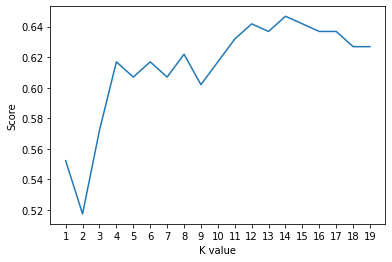

Maximum KNN Score is 64.68%


In [41]:
accuracies = {}

#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['KNN'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100

print("Maximum KNN Score is {:.2f}%".format(acc))

In [23]:
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# import ast

def join(text):
    string =' '.join(map(str,text))
    return string

df['final'] = df['stemming'].apply(join)

# def join_text_list(texts):
#     texts = ast.literal_eval(texts)
#     return ' '.join([text for text in texts])
# df["tweet_join"] = df["normal"].apply(join_text_list)


# instantiate the vectorizer object
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(df['final'])
tfidf_wm = tfidfvectorizer.fit_transform(df['final'])
#retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = df['content'] ,columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index =df['content'] ,columns = tfidf_tokens)
df_countvect.to_csv('df.csv')
df_tfidfvect.to_csv('tfidf.csv')

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

def join(text):
    string =' '.join(map(str,text))
    return string

df['final'] = df['normal'].apply(join)
# Feature Engineering 
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(df['final']).toarray()
terms = tf_idf.get_feature_names()
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))
    
print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)


col = pd.DataFrame(data, columns=['term','tf_idf'])
col

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (1001, 1000)


term     tf_idf
0       abal   0.512511
1      abang   1.686041
2    abcdxyz   0.505699
3       abis   6.628388
4      acara   1.007636
..       ...        ...
995      yuk  10.247361
996     yukk   1.564325
997    yukss   3.519152
998      yuu   0.993790
999     yuuu   1.390680

[1000 rows x 2 columns]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split()

In [10]:
# #  #=================================Normalisasi========================================#
# from modulenorm.modNormalize import normalize
# from modulenorm.modTokenizing import tokenize

# def spell(text_norm):
#     usenorm = normalize()
#     text_norm = usenorm.spellNormalize(text_norm) 
#     return text_norm

# df['normal'] = df['stemming'].apply(spell)
# df

KeyboardInterrupt: 